## Introduction

This notebook forms the main part of the "Feed your Python with Pandas" mini-tutorial.

It is a Jupyter Notebook - you can run code in the cells (using `ctrl+enter` or `shift+enter`), edit cells, and re-run at will.

<div class="alert alert-success">
Short activities are highlighted in green. Use the cell below each activity to write your answer.
</div>

## Notebook outline
The notebook is in three parts.

- **Cats: Basic Pandas methods**
    - creating a dataframe
    - accessing rows/values/columns
    - adding a row/column
    - deleting a row or column
    - re-naming columns
    - setting and re-setting the dataframe index
    - applying functions
    - iterating over rows
- **UV-Vis absorption: A more realistic example**
    - importing data from a file
    - tidying up the data (using what has been previously learnt)
    - filtering data
    - plotting data
- **UK Libraries: The Final Challenge**

## Preamble

The first thing we want to do is load the Python libraries we will be using into our namespace. The library names are shortened to save on typing.

In [1]:
import pandas as pd

# so that plots are displayed inline in the Jupyter notebook
%matplotlib inline  

# Cats
![cute_cat_pic](./images/cats.jpg)

## Creating a dataframe 

First we create two one-dimensional `Series` objects. One with information about Pebbles the cat and one with information about Fluffy the cat. We can then combine these to make a two-dimensional `DataFrame` object.

In [27]:
column_names = ['Name','Age','Colour']
Pebbles_data = ['Pebbles','7','grey'] # information about Pebbles the cat
Fluffy_data = ['Fluffy','1','white'] # information about Fluffy the cat

s1 = pd.Series(Pebbles_data, column_names) # Create a series for Pebbles
s2 = pd.Series(Fluffy_data, column_names) # Create a series for Fluffy

df = pd.DataFrame([s1,s2])  # combine the series to make a dataframe
df

,Name,Age,Colour
0,Pebbles,7,grey
1,Fluffy,1,white


## Accessing rows, values and columns in a dataframe

### Accessing rows

There are two ways to access the value rows in the dataframe above. Key point is that:

- `loc` works on the labels of your index
- `iloc` works on the positions of your index

For the dataframe above, the positions and labels of our index are the same.

In [3]:
# select the first row by position
print (df.iloc[0])

# select the first row by label
print (df.loc[0])

Name      Pebbles
Age             7
Colour       grey
Name: 0, dtype: object
Name      Pebbles
Age             7
Colour       grey
Name: 0, dtype: object


### Accessing values

We use a similar syntax to access values within a particular row. Remember that in Python indexing starts at 0!

In [4]:
# selection by position - row 0, column 2. 
print (df.iloc[0][2])   

# selection by label
print (df.loc[0]['Colour'])

grey
grey


<div class="alert alert-success">
See if you can work out how to access the `Fluffy` value in the dataframe. Print this out using the box below.
</div>


### Setting a column as an index

We may prefer to have cat names as our index instead of integers. Call the `set_index()` function to set one of the columns as an index. The `inplace` keyword tells Pandas to modify the dataframe in place without creating a new object (this will overwrite our original dataframe).

In [5]:
df.set_index('Name',inplace=True)
df

,Age,Colour
Name,,
Pebbles,7,grey
Fluffy,1,white


We can now see the difference between using `loc` and `iloc`.

<div class="alert alert-success">
Use `loc` and `iloc` to access the `Fluffy` row 
</div>

<div class="alert alert-success">
Use `loc` and `iloc` to access the `white` value
</div>

### Accessing columns
The syntax for accessing columns is straight forward as we can use the column labels.

In [6]:
df['Colour']

Name
Pebbles     grey
Fluffy     white
Name: Colour, dtype: object

## Adding a row or column to dataframe

### Adding rows to your dataframe

`loc` and `iloc` can be used to add rows to your dataframe

In [7]:
df.loc["Minty"]=["4","tabby"]
df

,Age,Colour
Name,,
Pebbles,7,grey
Fluffy,1,white
Minty,4,tabby


### Adding a column to your dataframe

We can create a new column `cat_toys` by creating a `Series` object. The `index` of the `Series` is set to the `index` of the dataframe.

In [8]:
cat_toys = pd.Series(['mouse','laser pen','wool'],index=df.index)
cat_toys

Name
Pebbles        mouse
Fluffy     laser pen
Minty           wool
dtype: object

We can use `loc` to add this to the dataframe:

In [9]:
df.loc[:,"Toy"] = cat_toys
df

,Age,Colour,Toy
Name,,,
Pebbles,7,grey,mouse
Fluffy,1,white,laser pen
Minty,4,tabby,wool


<div class="alert alert-success">
Create an  `Eye_colour` column which contains the...you guessed it...eye colour of each cat to the dataframe (you can decide on the colours).
</div>

### Resetting the dataframe index

It is often a good idea to keep the index. Use `reset_index` to reset.

In [10]:
df.reset_index(level=0,inplace=True)
df

,Name,Age,Colour,Toy
0,Pebbles,7,grey,mouse
1,Fluffy,1,white,laser pen
2,Minty,4,tabby,wool


## Deleting rows or columns from a dataframe

To delete rows and columns we se the `drop()` method. The axis argument specifies whether it is a row or a column.

In [11]:
# drop the 'toy' column
df.drop('Toy',axis=1,inplace=True)
df

,Name,Age,Colour
0,Pebbles,7,grey
1,Fluffy,1,white
2,Minty,4,tabby


In [12]:
# drop the row in position 1
df.drop([1],axis=0,inplace=True)
df

,Name,Age,Colour
0,Pebbles,7,grey
2,Minty,4,tabby


<div class="alert alert-success">
Delete the `Colour` column
</div>

## Applying functions to a dataframe column

We may want to convert the cat `Age` in years to an `Age` in months.

First we define a function which will do the conversion.

In [13]:
def years_to_months(x):
    return int(x)*12   # this converts a value in years to a value in months

We then apply the `years_to_months` function to the `Age` column

In [14]:
df['Age'] = df['Age'].apply(years_to_months)
df

,Name,Age,Colour
0,Pebbles,84,grey
2,Minty,48,tabby


## Renaming columns

We can then rename our column to reflect this recent change

In [15]:
df.rename(columns={"Age":"Age (months)"},inplace=True)
df

,Name,Age (months),Colour
0,Pebbles,84,grey
2,Minty,48,tabby


## Iterating over rows

You can interate over the rows of your dataframe by using `iterrows()` combined with a `for` loop

In [16]:
for index, row in df.iterrows():
    print ("This cat is called " + row['Name'])

This cat is called Pebbles
This cat is called Minty



This is all lovely, and hopefully you have got a feel for how to manipulate dataframes, but your research is probably not about the age and names of a couple of cats. Lets use a more realistic example.

# UV-Vis absorption
 

![uv-vis_pic](./images/uv-vis.jpg)

## Importing data from a file

We can use the function `read_csv` to read-in data from a file (in this case UV-Vis absorption data from four samples).

In [17]:
df = pd.read_csv("./data/UV-Vis_data.csv")

It is a large dataset of 1300 rows; use `head()` to see the top 5 rows

In [18]:
df.head()   

,Wavelength_1,Abs_1,Wavelength_2,Abs_2,Wavelength_3,Abs_3,Wavelength_4,Abs_4
0,1500,0.004148,1500,0.004138,1500,0.005953,1500,0.012077
1,1499,0.004362,1499,0.004331,1499,0.006137,1499,0.012277
2,1498,0.004511,1498,0.004460,1498,0.006307,1498,0.012400
3,1497,0.004189,1497,0.004218,1497,0.006018,1497,0.012140
4,1496,0.004270,1496,0.004241,1496,0.006075,1496,0.012225


Note the automatic indexing of the rows.

## Tidying up the dataframe

First lets set the `Wavelength` column as the index

In [19]:
df.set_index('Wavelength_1',inplace=True)
df.head()

,Abs_1,Wavelength_2,Abs_2,Wavelength_3,Abs_3,Wavelength_4,Abs_4
Wavelength_1,,,,,,,
1500,0.004148,1500,0.004138,1500,0.005953,1500,0.012077
1499,0.004362,1499,0.004331,1499,0.006137,1499,0.012277
1498,0.004511,1498,0.004460,1498,0.006307,1498,0.012400
1497,0.004189,1497,0.004218,1497,0.006018,1497,0.012140
1496,0.004270,1496,0.004241,1496,0.006075,1496,0.012225


We can rename this to `Wavelength (nm)` and remove the other wavelength columns (which have the same values; that is why we are using it as an index!).

In [20]:
df.index.rename('Wavelength (nm)',inplace=True)
df.head()

,Abs_1,Wavelength_2,Abs_2,Wavelength_3,Abs_3,Wavelength_4,Abs_4
Wavelength (nm),,,,,,,
1500,0.004148,1500,0.004138,1500,0.005953,1500,0.012077
1499,0.004362,1499,0.004331,1499,0.006137,1499,0.012277
1498,0.004511,1498,0.004460,1498,0.006307,1498,0.012400
1497,0.004189,1497,0.004218,1497,0.006018,1497,0.012140
1496,0.004270,1496,0.004241,1496,0.006075,1496,0.012225


In [21]:
df.drop(columns=['Wavelength_2','Wavelength_3','Wavelength_4'],inplace=True)
df.head()

,Abs_1,Abs_2,Abs_3,Abs_4
Wavelength (nm),,,,
1500,0.004148,0.004138,0.005953,0.012077
1499,0.004362,0.004331,0.006137,0.012277
1498,0.004511,0.004460,0.006307,0.012400
1497,0.004189,0.004218,0.006018,0.012140
1496,0.004270,0.004241,0.006075,0.012225


## Filtering data

We can print the absorption at a particular wavelength using the  `loc`  function index label (just like when we selected rows in the cats example).

In [22]:
df.loc[1000]   # print absorption data for wavelength 1000nm

Abs_1    0.028100
Abs_2    0.028109
Abs_3    0.030061
Abs_4    0.041029
Name: 1000, dtype: float64

We can also select rows using a boolean array (an array containing `True` or `False` values):

In [23]:
df.loc[df.index == 1000] # print absorption data for wavelength 1000nm

,Abs_1,Abs_2,Abs_3,Abs_4
Wavelength (nm),,,,
1000,0.0281,0.028109,0.030061,0.041029


<div class="alert alert-success">
Verify that `df.index == 1000` is a boolean array
</div>

We can select the rows for a range of wavelengths by using multiple boolean expressions:

In [24]:
df.loc[(df.index <= 1000) & (df.index > 990)]

,Abs_1,Abs_2,Abs_3,Abs_4
Wavelength (nm),,,,
1000,0.028100,0.028109,0.030061,0.041029
999,0.028251,0.028196,0.030167,0.041244
998,0.028338,0.028350,0.030341,0.041357
997,0.028469,0.028439,0.030444,0.041483
996,0.028596,0.028622,0.030571,0.041681
995,0.028750,0.028732,0.030710,0.041754
994,0.028888,0.028905,0.030812,0.041947
993,0.028995,0.028989,0.030989,0.042099
992,0.029265,0.029215,0.031231,0.042304


<div class="alert alert-success">
Select rows with wavelength less than 200
</div>

## Plotting

We can use `plot()` to plot a column of data. Note: `Pandas` uses the Python `matplotlib` library for plotting, which contains [many, many plotting options](https://matplotlib.org/gallery.html).

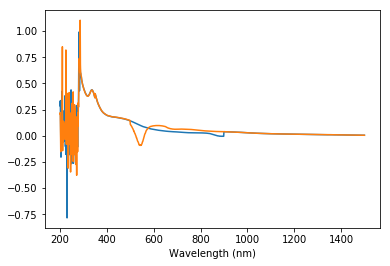

In [25]:
df['Abs_1'].plot()
df['Abs_2'].plot()

# UK Libraries

For the Final Challenge we are going to read in the Public Library dataset from the [UK governement data website](https://data.gov.uk/).

![library_pic](./images/library.jpg)

## Reading in data from a URL

We can use the `pd.read_csv` function to read in data directly from a URL. The `header` keyword tells the function which line to use for column headings. The `encoding` keyword specifies the unicode encoding type (for most csv files the default option, ie: not setting the keyword at all, would work but here they have used the less common `Latin1` encoding).


In [ ]:
url="https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/673041/Public_libraries_in_England-_extended_basic_dataset__as_on_1_July_2016_.csv"
library_df=pd.read_csv(url, header=1, encoding='latin-1')
library_df

## Final Challenge

Can you calculate how many libraries closed between 2010 and 2016? (Libraries which were included in statutory service on 1st April 2010, but were not included in statutory service on 1 July 2016).
You will need to use [boolean indexing](https://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing) for this challenge.
